In [1]:
#import package

import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
from sklearn import datasets


In [2]:
import matplotlib.pyplot as plt
import numpy as np

import plotly.plotly as py
import plotly.graph_objs as go
from scipy.sparse import csc_matrix
from scipy.sparse import csr_matrix

In [3]:
#import metadata
META = pd.read_excel('Strain_data.xlsx', sheetname='Strain info',index_col=0)

In [4]:
META

,NOTES,PATHOTYPE,Source,CD,UC,IBD
Strain,,,,,,
12-1-TI12,AIEC,InPec: AIEC,Terminal Ileum Biopsy,0,0,0
12-2-TI13,Commensal IBD,InPec: non-AIEC,Terminal Ileum Biopsy,0,0,0
18-3-TI5,Commensal IBD,InPec: non-AIEC,Terminal Ileum Biopsy,0,0,0
18-4-TI12,Commensal IBD,InPec: non-AIEC,Terminal Ileum Biopsy,0,0,0
3_2_53FAA,Commensal IBD,InPec: non-AIEC,Faecal,1,0,1
33-1-TI5,AIEC,InPec: AIEC,Terminal Ileum Biopsy,1,0,1
36-1-TI13,Commensal IBD,InPec: non-AIEC,Terminal Ileum Biopsy,1,0,1
39-2-TI18,Commensal IBD,InPec: non-AIEC,Terminal Ileum Biopsy,1,0,1
41-2-TI13,Commensal IBD,InPec: non-AIEC,Terminal Ileum Biopsy,1,0,1


In [5]:
#Create CD UC IBD matrix
META_disease=META.drop("NOTES",axis=1)
META_disease=META_disease.drop("PATHOTYPE",axis=1)
META_disease=META_disease.drop("Source",axis=1)
M_disease=META_disease.as_matrix()
M_disease

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [0, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [0, 1, 1],
       [0, 1, 1],
       [0, 1, 1],
       [0, 0, 0],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0,

In [6]:
#import pan genome matrix
base_matrix = pd.read_excel('BENG 213- Pangenome analysis.xlsx', sheetname='Matrix_w_Genes',index_col=0)

In [7]:
genelist=base_matrix.columns
genelist

Index([u'hypothetical protein', u'hypothetical protein.1', u'Toxin B',
       u'hypothetical protein.2', u'Hemin receptor', u'hypothetical protein.3',
       u'Ribonuclease HI', u'hypothetical protein.4',
       u'Ribosomal RNA large subunit methyltransferase H',
       u'Endoribonuclease YbeY',
       ...
       u'hypothetical protein.9586', u'Nif-specific regulatory protein',
       u'putative RNA polymerase sigma factor FecI.1',
       u'hypothetical protein.9587', u'hypothetical protein.9588',
       u'hypothetical protein.9589', u'hypothetical protein.9590',
       u'Antirestriction protein KlcA.11', u'hypothetical protein.9591',
       u'AIEC'],
      dtype='object', length=16089)

In [8]:
#strains in pan genome matrix
strain_list=[]
for i in base_matrix.index:
    strain_list.append(i)
print len(strain_list)
print strain_list

108
[u'12-1-TI12', u'12-2-TI13', u'18-3-TI5', u'18-4-TI12', u'33-1-TI5', u'36-1-TI13', u'39-2-TI18', u'3_2_53FAA', u'41-2-TI13', u'46-1-TI2', u'52-1-TI13', u'52-2-TI10', u'54-1-TI6', u'55-1-AU4', u'55-1-TI19', u'57-3-TI5', u'60-1-TI1', u'61-1-TI1', u'62-2-TI6', u'63-1-TI1', u'69-1-AU1', u'69-1-TI1', u'70-2-TI12', u'72-6-TI12', u'CD_1IM_3', u'CD_34_LN', u'CD_64_LN', u'E_coli_G58-1', u'E_coli_Nissle_1917', u'Escherichia_coli_042', u'Escherichia_coli_536', u'Escherichia_coli_55989', u'Escherichia_coli_ABU_83972', u'Escherichia_coli_APEC_O1', u'Escherichia_coli_ATCC_8739', u'Escherichia_coli_BL21_AM946981', u'Escherichia_coli_BL21_BL21-GoldpLysS_AG', u'Escherichia_coli_BL21_CP001509', u'Escherichia_coli_BW2952', u'Escherichia_coli_B_str_REL606', u'Escherichia_coli_CFT073', u'Escherichia_coli_DH1', u'Escherichia_coli_DH1_ME8569', u'Escherichia_coli_E24377A', u'Escherichia_coli_ED1a', u'Escherichia_coli_HS', u'Escherichia_coli_IAI1', u'Escherichia_coli_IAI39', u'Escherichia_coli_IHE3034', u'

In [9]:
#Separate metadata into separate categories
#Strain list for Metadata
strain_type=META['NOTES']
patho_type=META['PATHOTYPE']
source_type=META['Source']
strains_meta=META.index

In [10]:
strain_type

Strain
12-1-TI12                                  AIEC
12-2-TI13                         Commensal IBD
18-3-TI5                          Commensal IBD
18-4-TI12                         Commensal IBD
3_2_53FAA                         Commensal IBD
33-1-TI5                                   AIEC
36-1-TI13                         Commensal IBD
39-2-TI18                         Commensal IBD
41-2-TI13                         Commensal IBD
46-1-TI2                          Commensal IBD
52-1-TI13                                  AIEC
52-2-TI10                         Commensal IBD
54-1-TI6                          Commensal IBD
55-1-AU4                          Commensal IBD
55-1-TI19                         Commensal IBD
57-3-TI5                                   AIEC
60-1-TI1                                   AIEC
61-1-TI1                                   AIEC
62-2-TI6                          Commensal IBD
63-1-TI1                          Commensal IBD
69-1-AU1                         

In [11]:
#find strains in metadata not in matrix
strains_to_drop=[]
for i in strains_meta:
    if i not in strain_list:
        strains_to_drop.append(i)

In [12]:
#drop strains not in matrix
for i in strains_to_drop:
    if i in strain_type.index:
        strain_type=strain_type.drop(i, axis=0)
    if i in patho_type.index:
        patho_type=patho_type.drop(i, axis=0)
    if i in source_type.index:
        source_type=source_type.drop(i, axis=0)
if len(base_matrix)==len(strain_type):
    print 'Yes'
if len(base_matrix)==len(patho_type):
    print 'Yes'
if len(base_matrix)==len(source_type):
    print 'Yes'

Yes
Yes
Yes


In [13]:
#Decision Trees 
from random import *


In [14]:
base_sample=base_matrix
base_sample=base_sample.sample(54)
base_sample
strain_sample=base_sample.index
test_strains=[]
for i in strain_sample:
    if i in strain_type.index:
        strain_type=strain_type.drop(i, axis=0)
    if i in patho_type.index:
        patho_type=patho_type.drop(i, axis=0)
    if i in source_type.index:
        source_type=source_type.drop(i, axis=0)
print '%s %s %s' % (strain_type.shape, patho_type.shape, source_type.shape)

(54L,) (54L,) (54L,)


In [15]:
test_strains=[]
for x in strain_list:
    if x not in strain_sample:      
        test_strains.append(x)
print len(test_strains)
54+54        

54


108

In [16]:
test_base=base_matrix.copy()
for i in strain_sample:
    test_base=test_base.drop(i, axis=0)
print test_base.shape

(54, 16089)


In [17]:
def unique(list1):
    unique_list = []
     # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    return unique_list           

In [18]:
strain_types_U=unique(strain_type)
print (len(strain_types_U))
print (strain_types_U)

9
[u'Commensal IBD', u'AIEC', u'Commensal', u'UPEC', u'APEC', u'ETEC', u'ExPEC', u'EHEC', u'Shigella']


In [19]:
patho_type_U=unique(patho_type)
print (len(patho_type_U))
print (patho_type_U)

8
[u'InPec: non-AIEC', u'InPec: AIEC', u'Commensal', u'ExPec: UPEC', u'ExPec', u'InPec: EHEC', u'InPec: EPEC', u'Shigella']


In [20]:
source_type_U=unique(source_type)
print (len(source_type_U))
print (source_type_U)

11
[u'Terminal Ileum Biopsy', u'Faecal', u'Apthous Ulcer Biopsy', u'Urinary', u'avian', u'fecal', u'Unknown', u'Colon', u'intestinal mucosa', u'colon biopsy', u'ileum']


In [21]:
def countypes(list1,unique):
    
    c2=0
    for i in range(len(unique)):
        c=0
        for x in list1:
            if x==unique[i]:
                c+=1
        print '%s %s' % (unique[i],c)
        c2=c2+c
    print c2

In [22]:
countypes(strain_type, strain_types_U)

Commensal IBD 15
AIEC 10
Commensal 14
UPEC 3
APEC 1
ETEC 2
ExPEC 2
EHEC 4
Shigella 3
54


In [23]:
countypes(patho_type, patho_type_U)

InPec: non-AIEC 15
InPec: AIEC 10
Commensal 16
ExPec: UPEC 4
ExPec 1
InPec: EHEC 4
InPec: EPEC 1
Shigella 3
54


In [24]:
countypes(source_type, source_type_U)

Terminal Ileum Biopsy 11
Faecal 8
Apthous Ulcer Biopsy 1
Urinary 4
avian 1
fecal 1
Unknown 17
Colon 4
intestinal mucosa 1
colon biopsy 3
ileum 3
54


In [25]:
 from collections import Counter
Counter(strain_type).values()# counts the elements' frequency
len(strain_type)

54

In [26]:
def replace(list1,unique):
    list2 = list1.copy()
    c2=0
    for i in range(len(unique)):
        c=0
        for x in list1:
            if x==unique[i]:
                list2=list2.replace(x,i)
                c+=1
        print '%s %s' % (unique[i],c)
        c2=c2+c
    return list2

In [27]:
strain_type_sub=replace(strain_type,strain_types_U)

Commensal IBD 15
AIEC 10
Commensal 14
UPEC 3
APEC 1
ETEC 2
ExPEC 2
EHEC 4
Shigella 3


In [28]:
patho_type_sub=replace(patho_type,patho_type_U)

InPec: non-AIEC 15
InPec: AIEC 10
Commensal 16
ExPec: UPEC 4
ExPec 1
InPec: EHEC 4
InPec: EPEC 1
Shigella 3


In [29]:
source_type_sub=replace(source_type,source_type_U)

Terminal Ileum Biopsy 11
Faecal 8
Apthous Ulcer Biopsy 1
Urinary 4
avian 1
fecal 1
Unknown 17
Colon 4
intestinal mucosa 1
colon biopsy 3
ileum 3


In [30]:
base=base_sample.as_matrix()
base.shape

(54L, 16089L)

In [31]:
test_base_m=test_base.as_matrix()
test_base_m=csc_matrix(test_base_m, dtype=np.int8).toarray()
test_base_m[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [33]:
test_base

,hypothetical protein,hypothetical protein.1,Toxin B,hypothetical protein.2,Hemin receptor,hypothetical protein.3,Ribonuclease HI,hypothetical protein.4,Ribosomal RNA large subunit methyltransferase H,Endoribonuclease YbeY,...,hypothetical protein.9586,Nif-specific regulatory protein,putative RNA polymerase sigma factor FecI.1,hypothetical protein.9587,hypothetical protein.9588,hypothetical protein.9589,hypothetical protein.9590,Antirestriction protein KlcA.11,hypothetical protein.9591,AIEC
Strain,,,,,,,,,,,,,,,,,,,,,
18-4-TI12,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
33-1-TI5,0,0,0,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
39-2-TI18,0,0,0,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3_2_53FAA,0,0,0,0,1,0,1,0,1,1,...,1,0,0,0,0,0,0,0,0,1
41-2-TI13,1,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
46-1-TI2,0,0,0,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
52-2-TI10,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
54-1-TI6,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
60-1-TI1,0,0,0,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [34]:
#Strain Type Decision Tree 
from sklearn import tree
import graphviz 

clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(base, strain_type_sub )

In [35]:
out=clf1.predict([test_base_m[0]])
strain=test_base.index[0]
print out
print strain_types_U[6]
print "Strain type: %s" % (test_base.index[0])
print "True Type: %s " % (strain_type[strain])

[0]
ExPEC
Strain type: 18-4-TI12
True Type: Commensal IBD 


In [36]:
test_base

,hypothetical protein,hypothetical protein.1,Toxin B,hypothetical protein.2,Hemin receptor,hypothetical protein.3,Ribonuclease HI,hypothetical protein.4,Ribosomal RNA large subunit methyltransferase H,Endoribonuclease YbeY,...,hypothetical protein.9586,Nif-specific regulatory protein,putative RNA polymerase sigma factor FecI.1,hypothetical protein.9587,hypothetical protein.9588,hypothetical protein.9589,hypothetical protein.9590,Antirestriction protein KlcA.11,hypothetical protein.9591,AIEC
Strain,,,,,,,,,,,,,,,,,,,,,
18-4-TI12,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
33-1-TI5,0,0,0,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
39-2-TI18,0,0,0,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3_2_53FAA,0,0,0,0,1,0,1,0,1,1,...,1,0,0,0,0,0,0,0,0,1
41-2-TI13,1,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
46-1-TI2,0,0,0,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
52-2-TI10,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
54-1-TI6,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
60-1-TI1,0,0,0,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [37]:
def decisiontreetest(test_base_matrix,test_base ,type_sub, type_sub_u):
    true_positive=0
    false_positive=0
    true_positive_list=[]
    false_postive_list=[]
    clf1 = tree.DecisionTreeClassifier()
    clf1 = clf1.fit(base, type_sub)
    predicted_matrix=[]
    test_base_matrix=csr_matrix(test_base_matrix, dtype=np.int8).toarray()
    for i in range(len(test_base_matrix)):
        out=clf1.predict([test_base_matrix[i]])
        predicted_matrix.append(out)
        strain=test_base.index[i]
        if out==type_sub[strain]:
            true_positive+=1
            true_positive_list.append(strain)
        else:
            false_positive+=1
            false_postive_list.append(strain)

    accuracy=((float(true_positive)/((float(false_positive)+(float(true_positive))))))
    print '%s' % (type_sub)
    print "Number of True classifications: %s" % (true_positive)
    print "Number of False classifications: %s" % (false_positive)
    print "Accuracy: %s" % (accuracy)

    print false_positive+true_positive
    y = [type_sub]
    x = [predicted_matrix]
    legend = ['Predicted Type', 'True Type']
    plt.hist([x,y],color=['blue', 'green'])
    plt.xlabel("Integer Corresponding to Type")
    plt.ylabel("Frequency")
    plt.legend(legend)
    plt.xticks(range(len(type_sub_u)))
    plt.yticks(range(1, 20))
    plt.show()
    result = zip(range(len(type_sub_u)), type_sub_u)

    print result

Strain
18-4-TI12                                 0
3_2_53FAA                                 0
33-1-TI5                                  1
39-2-TI18                                 0
41-2-TI13                                 0
46-1-TI2                                  0
52-2-TI10                                 0
54-1-TI6                                  0
60-1-TI1                                  1
62-2-TI6                                  0
63-1-TI1                                  0
69-1-AU1                                  0
72-6-TI12                                 0
E_coli_G58-1                              2
Escherichia_coli_ABU_83972                3
Escherichia_coli_APEC_O1                  4
Escherichia_coli_ATCC_8739                2
Escherichia_coli_B_str_REL606             2
Escherichia_coli_BL21_AM946981            2
Escherichia_coli_CFT073                   3
Escherichia_coli_DH1                      2
Escherichia_coli_E24377A                  5
Escherichia_coli_IAI1    

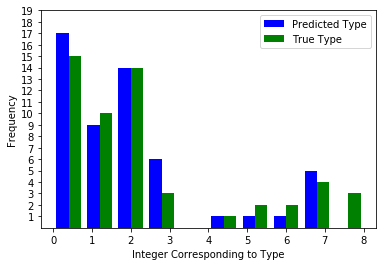

[(0, u'Commensal IBD'), (1, u'AIEC'), (2, u'Commensal'), (3, u'UPEC'), (4, u'APEC'), (5, u'ETEC'), (6, u'ExPEC'), (7, u'EHEC'), (8, u'Shigella')]


In [38]:
decisiontreetest(test_base_m,test_base,strain_type_sub, strain_types_U)

Strain
18-4-TI12                                 0
3_2_53FAA                                 0
33-1-TI5                                  1
39-2-TI18                                 0
41-2-TI13                                 0
46-1-TI2                                  0
52-2-TI10                                 0
54-1-TI6                                  0
60-1-TI1                                  1
62-2-TI6                                  0
63-1-TI1                                  0
69-1-AU1                                  0
72-6-TI12                                 0
E_coli_G58-1                              2
Escherichia_coli_ABU_83972                3
Escherichia_coli_APEC_O1                  2
Escherichia_coli_ATCC_8739                2
Escherichia_coli_B_str_REL606             2
Escherichia_coli_BL21_AM946981            2
Escherichia_coli_CFT073                   3
Escherichia_coli_DH1                      2
Escherichia_coli_E24377A                  2
Escherichia_coli_IAI1    

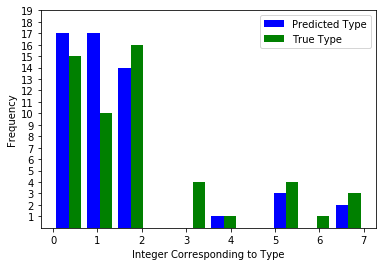

[(0, u'InPec: non-AIEC'), (1, u'InPec: AIEC'), (2, u'Commensal'), (3, u'ExPec: UPEC'), (4, u'ExPec'), (5, u'InPec: EHEC'), (6, u'InPec: EPEC'), (7, u'Shigella')]


In [39]:
decisiontreetest(test_base_m,test_base,patho_type_sub, patho_type_U)

Strain
18-4-TI12                                  0
3_2_53FAA                                  1
33-1-TI5                                   0
39-2-TI18                                  0
41-2-TI13                                  0
46-1-TI2                                   0
52-2-TI10                                  0
54-1-TI6                                   0
60-1-TI1                                   0
62-2-TI6                                   0
63-1-TI1                                   0
69-1-AU1                                   2
72-6-TI12                                  0
E_coli_G58-1                               1
Escherichia_coli_ABU_83972                 3
Escherichia_coli_APEC_O1                   4
Escherichia_coli_ATCC_8739                 5
Escherichia_coli_B_str_REL606              6
Escherichia_coli_BL21_AM946981             6
Escherichia_coli_CFT073                    3
Escherichia_coli_DH1                       6
Escherichia_coli_E24377A                   6
Esc

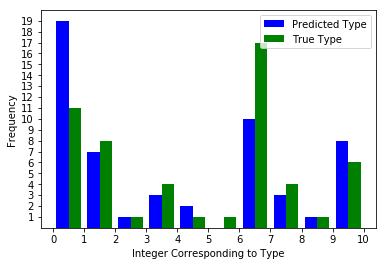

[(0, u'Terminal Ileum Biopsy'), (1, u'Faecal'), (2, u'Apthous Ulcer Biopsy'), (3, u'Urinary'), (4, u'avian'), (5, u'fecal'), (6, u'Unknown'), (7, u'Colon'), (8, u'intestinal mucosa'), (9, u'colon biopsy'), (10, u'ileum')]


In [40]:
decisiontreetest(test_base_m,test_base, source_type_sub, source_type_U)


In [41]:
clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(base, strain_type_sub)

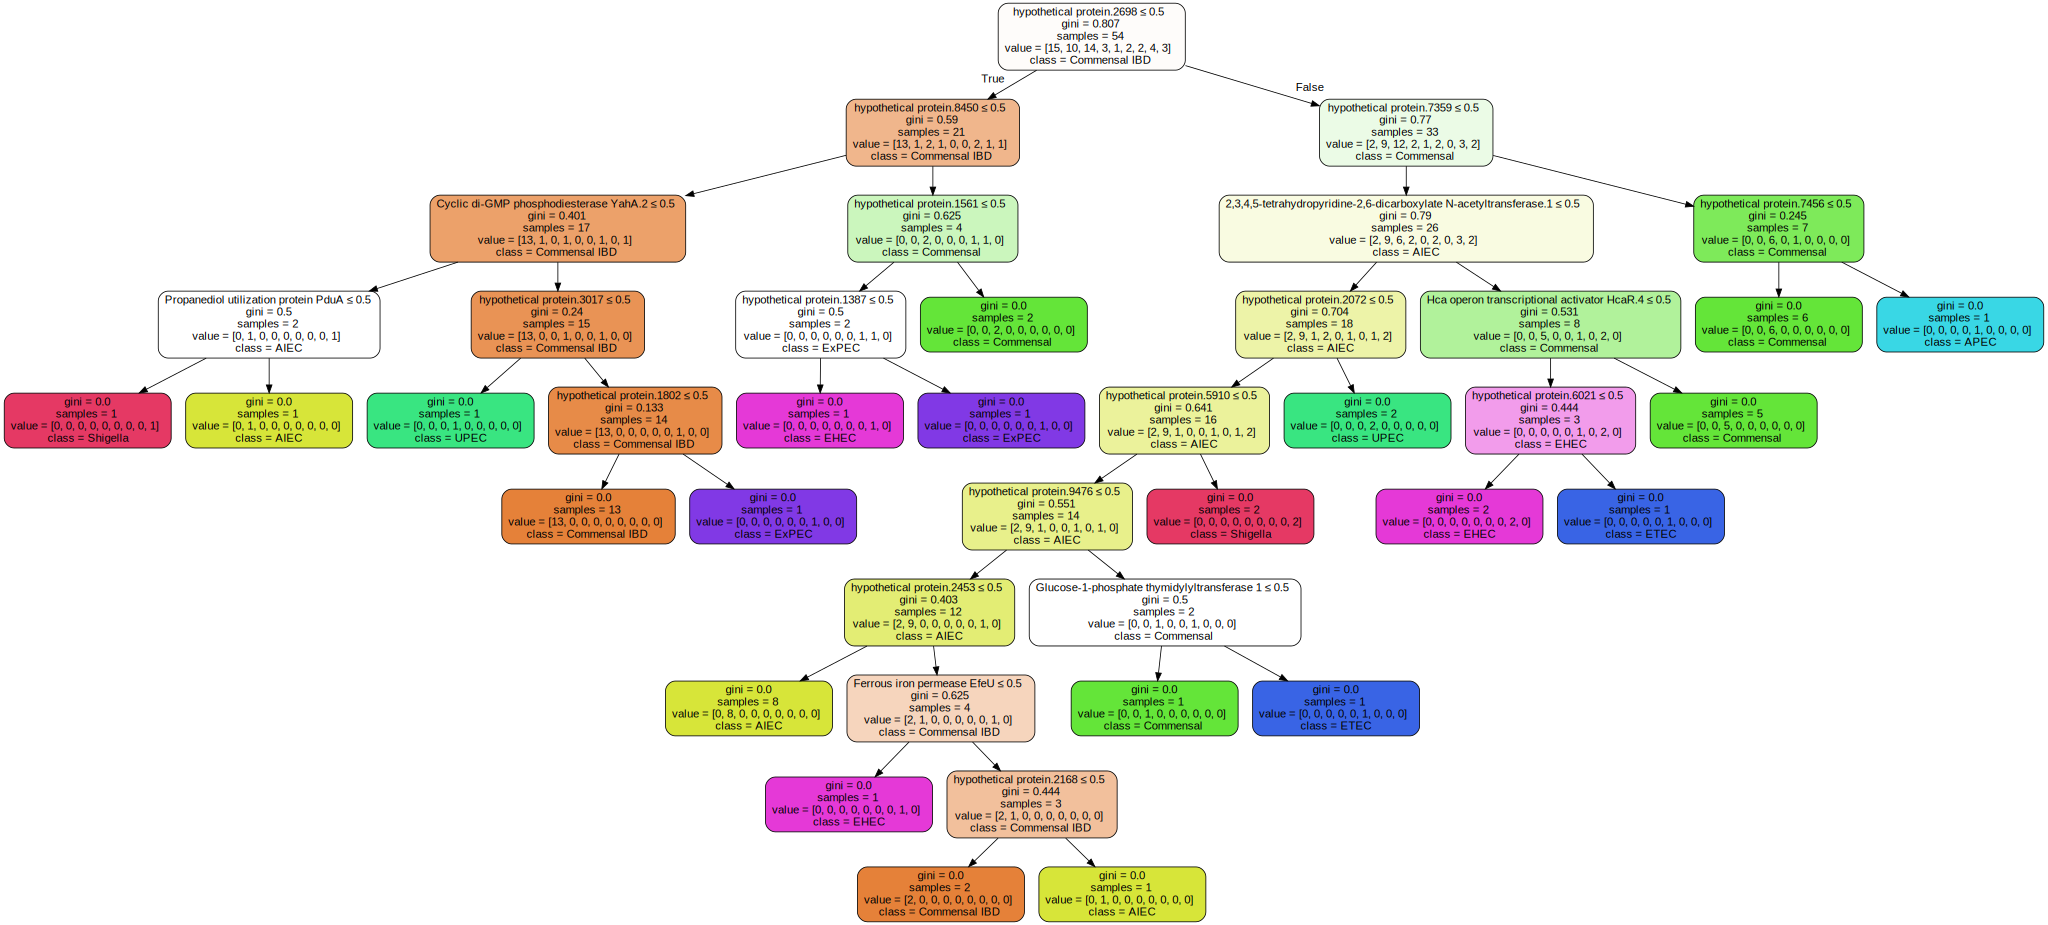

In [42]:
clf1= tree.export_graphviz(clf1, out_file=None,feature_names=genelist,  
                         class_names=strain_types_U, 
                         filled=True, rounded=True,  
                         special_characters=True,max_depth=10)  
graph2 = graphviz.Source(clf1)  
graph2.render("Strain Type Decision Tree Max 10")
graph2

In [43]:
#Pathotype Decision Tree 
from sklearn import tree
import graphviz 

clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(base, patho_type_sub )

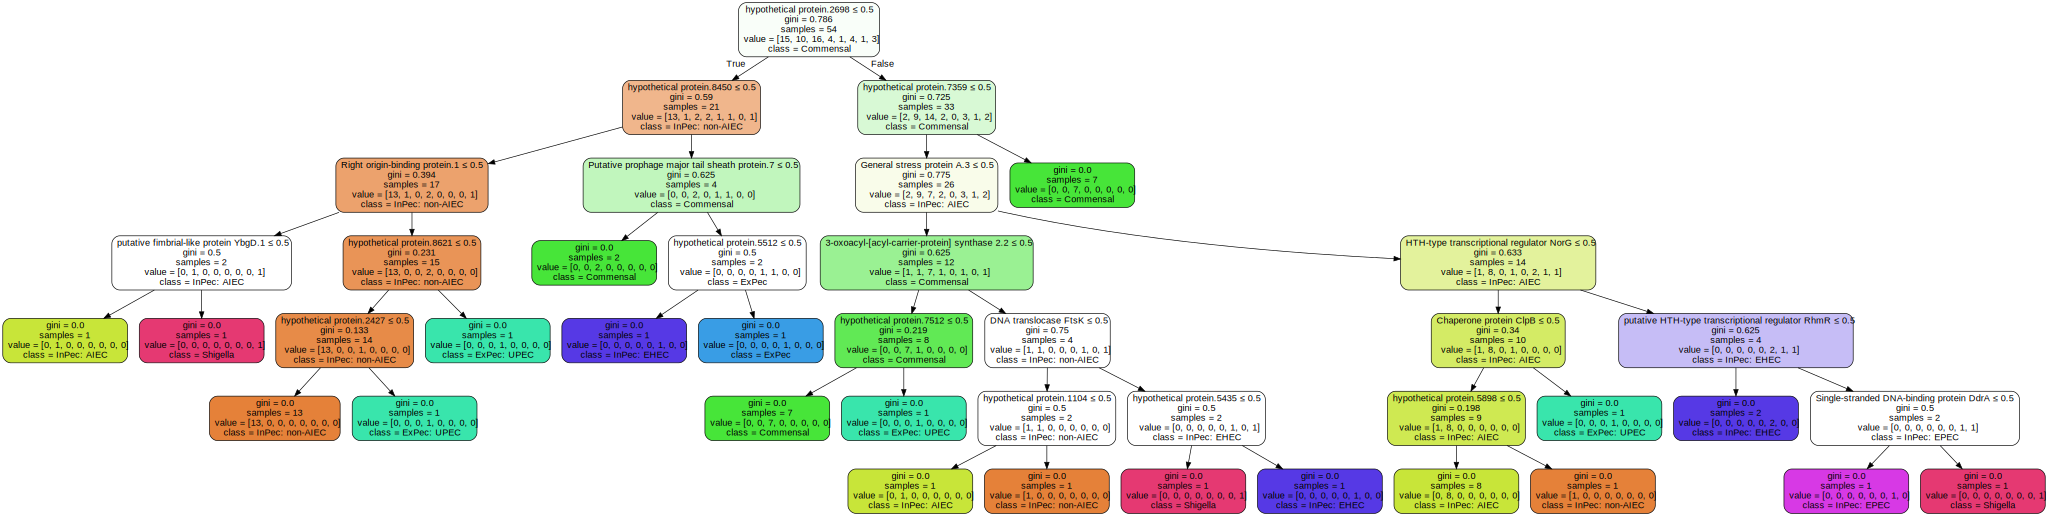

In [44]:
clf1= tree.export_graphviz(clf1, out_file=None,feature_names=genelist,  
                         class_names=patho_type_U, 
                         filled=True, rounded=True,  
                         special_characters=True,max_depth=10)  
graph2 = graphviz.Source(clf1)  
graph2.render("Pathotype Decision Tree Max 10")
graph2

In [45]:
#Source Type Decision Tree 
from sklearn import tree
import graphviz 

clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(base, source_type_sub)

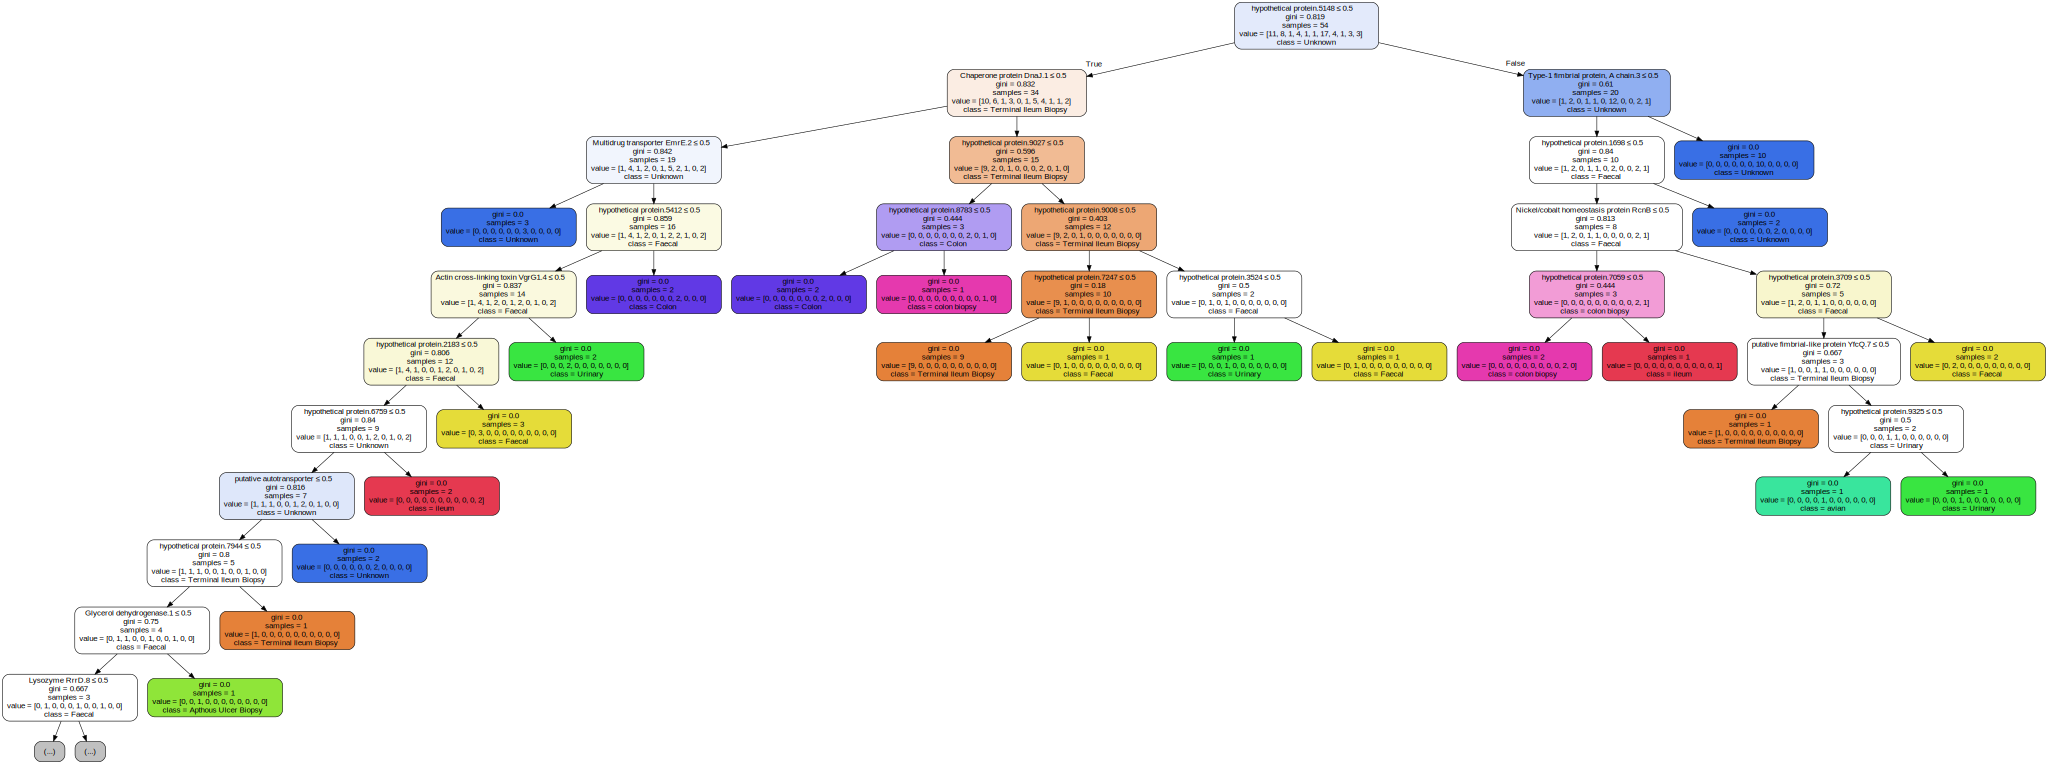

In [46]:
clf1= tree.export_graphviz(clf1, out_file=None,feature_names=genelist,  
                         class_names=source_type_U, 
                         filled=True, rounded=True,  
                         special_characters=True,max_depth=10)  
graph2 = graphviz.Source(clf1)  
graph2.render("Source Type Decision Tree Max 10")
graph2

In [47]:
#HEAT MAP of 'CD','UC','IBD' 
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [48]:
uniform_data = np.random.rand(10, 12)
print M_disease

[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]
 [0 1 1]
 [0 0 0]
 [0 0 0]
 [1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]
 [0 1 1]
 [0 1 1]
 [0 1 1]
 [0 0 0]
 [1 0 1]
 [1 0 1]
 [1 0 1]
 [0 1 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 0 1]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 0 1]
 [1 0 1]
 [0 0 0]
 [1 0 1]
 [1 0 1]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 1 1]
 [0 1 1]
 [0 1 1]
 [0 1 1]
 [0 1 1]
 [1 0 1]
 [0 1 1]
 [1 0 1]]


In [49]:
fig, ax = plt.subplots(figsize=(20,20))       

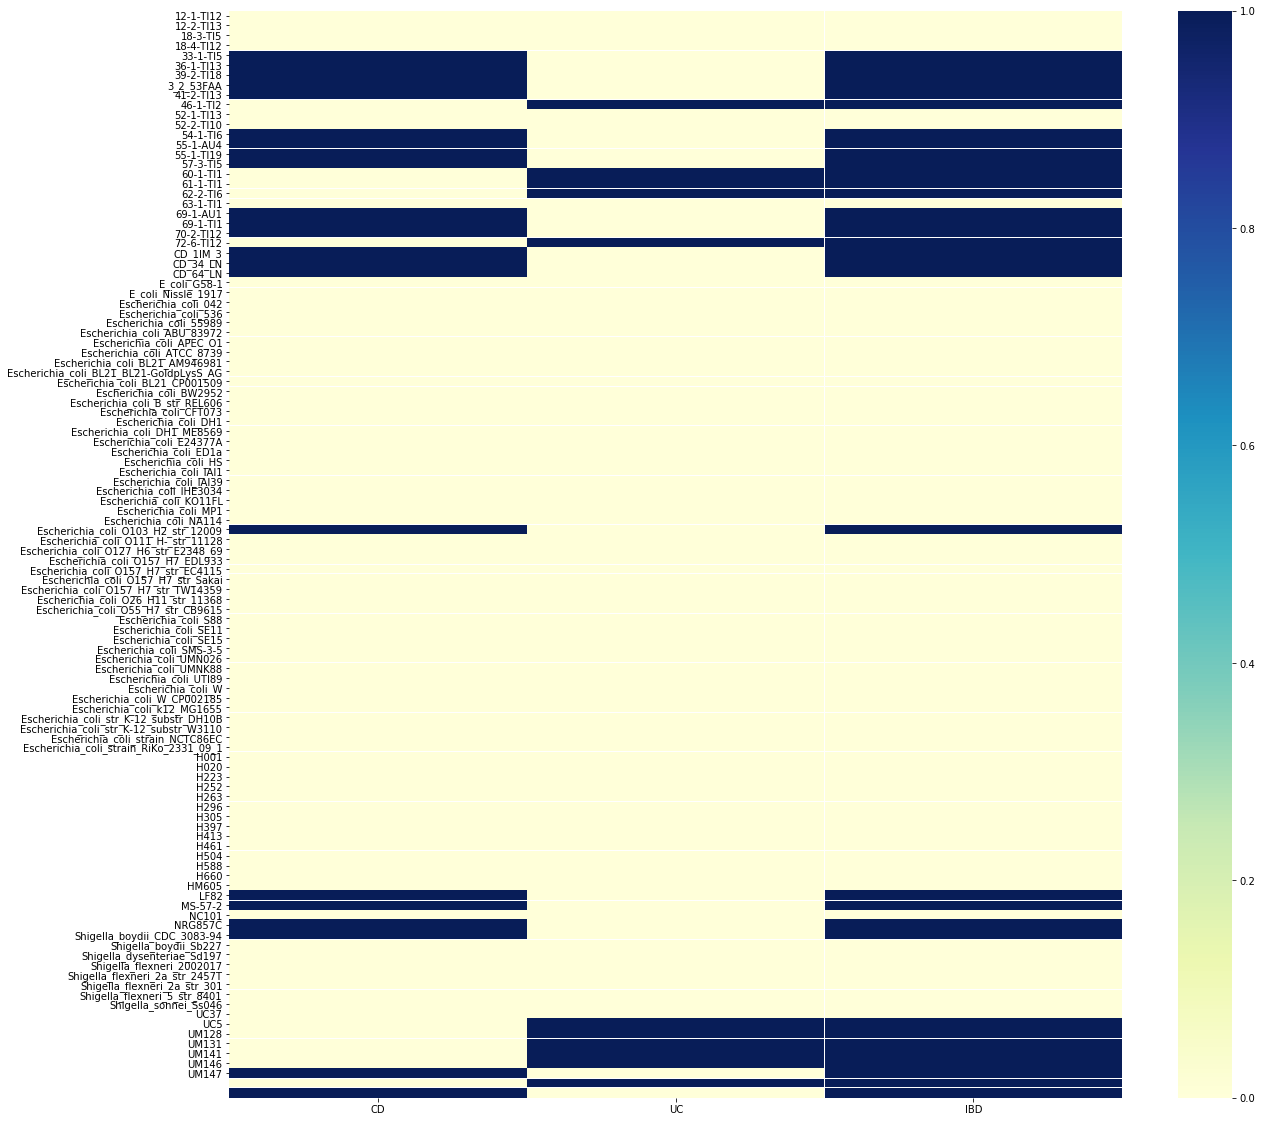

In [50]:
  # Sample figsize in inches
ax = sns.heatmap(M_disease,cmap="YlGnBu",linewidths=.001,yticklabels=strain_list,xticklabels=["CD","UC","IBD"])
plt.show()
fig.savefig("output.png") 


In [51]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [52]:
# Build a classification task using 5 informative features

def forestfeature(base, type_sub, type_sub_u):
    base, type_sub = make_classification(n_samples=100,
                           n_features=10,
                           n_informative=5,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=len(type_sub_u),
                           random_state=0,
                           shuffle=False)

    # Build a forest and compute the feature importances
    forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

    forest.fit(base, type_sub)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(base.shape[1]):
        print ("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(base.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
    plt.xticks(range(base.shape[1]), indices)
    plt.xlim([-1, base.shape[1]])
    plt.show()

Feature ranking:
1. feature 1 (0.112845)
2. feature 3 (0.112753)
3. feature 0 (0.110738)
4. feature 4 (0.110591)
5. feature 2 (0.107561)
6. feature 5 (0.097353)
7. feature 6 (0.087700)
8. feature 8 (0.086887)
9. feature 7 (0.086850)
10. feature 9 (0.086723)


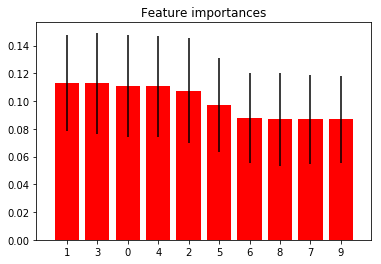

In [53]:
forestfeature(base,strain_type_sub, strain_types_U)

Feature ranking:
1. feature 0 (0.134311)
2. feature 2 (0.127496)
3. feature 1 (0.119282)
4. feature 4 (0.107244)
5. feature 3 (0.096525)
6. feature 7 (0.089144)
7. feature 9 (0.086041)
8. feature 5 (0.085470)
9. feature 6 (0.080262)
10. feature 8 (0.074226)


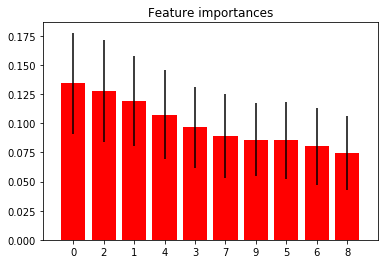

In [54]:
forestfeature(base,patho_type_sub, patho_type_U)

Feature ranking:
1. feature 0 (0.113975)
2. feature 2 (0.110981)
3. feature 4 (0.109272)
4. feature 3 (0.108255)
5. feature 1 (0.107103)
6. feature 7 (0.094000)
7. feature 6 (0.092936)
8. feature 8 (0.091515)
9. feature 9 (0.086599)
10. feature 5 (0.085365)


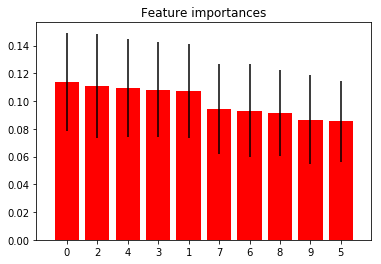

In [55]:
forestfeature(base,source_type_sub, source_type_U)

In [56]:
#decision tree predictor based on a reduced feature matrix through an Extra tree classifier 

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

print base.shape

clf = ExtraTreesClassifier()
clf = clf.fit(base, strain_type_sub)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
base_new = model.transform(base)
base_new.shape         

(54L, 16089L)


(54L, 292L)

In [58]:
test_base

,hypothetical protein,hypothetical protein.1,Toxin B,hypothetical protein.2,Hemin receptor,hypothetical protein.3,Ribonuclease HI,hypothetical protein.4,Ribosomal RNA large subunit methyltransferase H,Endoribonuclease YbeY,...,hypothetical protein.9586,Nif-specific regulatory protein,putative RNA polymerase sigma factor FecI.1,hypothetical protein.9587,hypothetical protein.9588,hypothetical protein.9589,hypothetical protein.9590,Antirestriction protein KlcA.11,hypothetical protein.9591,AIEC
Strain,,,,,,,,,,,,,,,,,,,,,
18-4-TI12,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
33-1-TI5,0,0,0,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
39-2-TI18,0,0,0,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3_2_53FAA,0,0,0,0,1,0,1,0,1,1,...,1,0,0,0,0,0,0,0,0,1
41-2-TI13,1,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
46-1-TI2,0,0,0,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
52-2-TI10,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
54-1-TI6,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
60-1-TI1,0,0,0,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [59]:
test_base_m

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int8)

In [62]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

print test_base.shape

clf = ExtraTreesClassifier()
clf = clf.fit(test_base, strain_type_sub)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
test_base_new_m = model.transform(test_base_m)
print test_base_new_m.shape  


(54, 16089)
(54L, 196L)


In [61]:
test_base_new_m

array([[1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 1]], dtype=int8)

In [64]:
def decisiontreetest2(test_base_matrix,test_base ,type_sub, type_sub_u):
    true_positive=0
    false_positive=0
    true_positive_list=[]
    false_postive_list=[]
    clf1 = tree.DecisionTreeClassifier()
    clf1 = clf1.fit(test_base_matrix, type_sub)
    predicted_matrix=[]
    test_base_matrix=csr_matrix(test_base_matrix, dtype=np.int8).toarray()
    for i in range(len(test_base_matrix)):
        out=clf1.predict([test_base_matrix[i]])
        predicted_matrix.append(out)
        strain=test_base.index[i]
        if out==type_sub[strain]:
            true_positive+=1
            true_positive_list.append(strain)
        else:
            false_positive+=1
            false_postive_list.append(strain)

    accuracy=((float(true_positive)/((float(false_positive)+(float(true_positive))))))
    print '%s' % (type_sub)
    print "Number of True classifications: %s" % (true_positive)
    print "Number of False classifications: %s" % (false_positive)
    print "Accuracy: %s" % (accuracy)

    print false_positive+true_positive
    y = [type_sub]
    x = [predicted_matrix]
    legend = ['Predicted Type', 'True Type']
    plt.hist([x,y],color=['blue', 'green'])
    plt.xlabel("Integer Corresponding to Type")
    plt.ylabel("Frequency")
    plt.legend(legend)
    plt.xticks(range(len(type_sub_u)))
    plt.yticks(range(1, 20))
    plt.show()
    result = zip(range(len(type_sub_u)), type_sub_u)

    print result

Strain
18-4-TI12                                 0
3_2_53FAA                                 0
33-1-TI5                                  1
39-2-TI18                                 0
41-2-TI13                                 0
46-1-TI2                                  0
52-2-TI10                                 0
54-1-TI6                                  0
60-1-TI1                                  1
62-2-TI6                                  0
63-1-TI1                                  0
69-1-AU1                                  0
72-6-TI12                                 0
E_coli_G58-1                              2
Escherichia_coli_ABU_83972                3
Escherichia_coli_APEC_O1                  4
Escherichia_coli_ATCC_8739                2
Escherichia_coli_B_str_REL606             2
Escherichia_coli_BL21_AM946981            2
Escherichia_coli_CFT073                   3
Escherichia_coli_DH1                      2
Escherichia_coli_E24377A                  5
Escherichia_coli_IAI1    

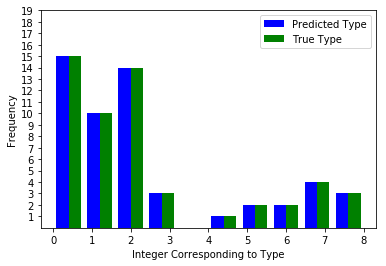

[(0, u'Commensal IBD'), (1, u'AIEC'), (2, u'Commensal'), (3, u'UPEC'), (4, u'APEC'), (5, u'ETEC'), (6, u'ExPEC'), (7, u'EHEC'), (8, u'Shigella')]


In [65]:
from sklearn import tree
import graphviz 

clf1 = tree.DecisionTreeClassifier()
decisiontreetest2(test_base_new_m, test_base, strain_type_sub, strain_types_U)


Strain
18-4-TI12                                  0
3_2_53FAA                                  1
33-1-TI5                                   0
39-2-TI18                                  0
41-2-TI13                                  0
46-1-TI2                                   0
52-2-TI10                                  0
54-1-TI6                                   0
60-1-TI1                                   0
62-2-TI6                                   0
63-1-TI1                                   0
69-1-AU1                                   2
72-6-TI12                                  0
E_coli_G58-1                               1
Escherichia_coli_ABU_83972                 3
Escherichia_coli_APEC_O1                   4
Escherichia_coli_ATCC_8739                 5
Escherichia_coli_B_str_REL606              6
Escherichia_coli_BL21_AM946981             6
Escherichia_coli_CFT073                    3
Escherichia_coli_DH1                       6
Escherichia_coli_E24377A                   6
Esc

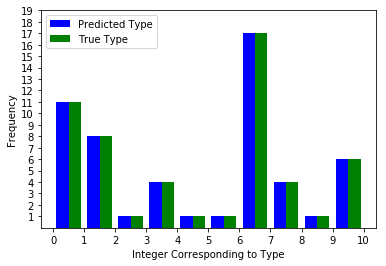

[(0, u'Terminal Ileum Biopsy'), (1, u'Faecal'), (2, u'Apthous Ulcer Biopsy'), (3, u'Urinary'), (4, u'avian'), (5, u'fecal'), (6, u'Unknown'), (7, u'Colon'), (8, u'intestinal mucosa'), (9, u'colon biopsy'), (10, u'ileum')]


In [68]:
decisiontreetest2(test_base_m, test_base, source_type_sub, source_type_U)


Strain
18-4-TI12                                 0
3_2_53FAA                                 0
33-1-TI5                                  1
39-2-TI18                                 0
41-2-TI13                                 0
46-1-TI2                                  0
52-2-TI10                                 0
54-1-TI6                                  0
60-1-TI1                                  1
62-2-TI6                                  0
63-1-TI1                                  0
69-1-AU1                                  0
72-6-TI12                                 0
E_coli_G58-1                              2
Escherichia_coli_ABU_83972                3
Escherichia_coli_APEC_O1                  2
Escherichia_coli_ATCC_8739                2
Escherichia_coli_B_str_REL606             2
Escherichia_coli_BL21_AM946981            2
Escherichia_coli_CFT073                   3
Escherichia_coli_DH1                      2
Escherichia_coli_E24377A                  2
Escherichia_coli_IAI1    

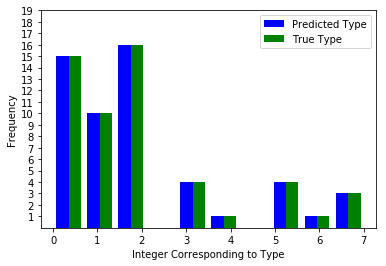

[(0, u'InPec: non-AIEC'), (1, u'InPec: AIEC'), (2, u'Commensal'), (3, u'ExPec: UPEC'), (4, u'ExPec'), (5, u'InPec: EHEC'), (6, u'InPec: EPEC'), (7, u'Shigella')]


In [66]:
decisiontreetest2(test_base_new_m,test_base, patho_type_sub, patho_type_U)
